# Data Exploration

Basic Visualization of Demog_DS_TRAIN_15K.csv

## Setup

In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from util import plot_bar_counts, plot_bin_bar_counts
from util import encode_categorical_data
from util import native, primary

## Aggregate Statistics of Initial Data Set

In [27]:
df = pd.read_csv('data/Demog_DS_TRAIN_15K.csv')

# Aggregate stats about data set
print('Aggregate statistics for Demog_DS_TRAIN_15K.csv\n')
df.info()
print('\n\n----------------------------------------\n\n')

# Replace missing fields with NaN
df.replace(' ?', np.nan, inplace=True)

# Aggregate stats about noisy observations
print('Incomplete observations')
df.isnull().sum()

Aggregate statistics for Demog_DS_TRAIN_15K.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15682 entries, 0 to 15681
Data columns (total 15 columns):
age               15682 non-null int64
workclass         15682 non-null object
fnlwgt            15682 non-null int64
education         15682 non-null object
education-num     15682 non-null int64
marital-status    15682 non-null object
occupation        15682 non-null object
relationship      15682 non-null object
race              15682 non-null object
sex               15682 non-null object
capital-gain      15682 non-null int64
capital-loss      15682 non-null int64
hours-per-week    15682 non-null int64
native-country    15682 non-null object
Income            15682 non-null object
dtypes: int64(6), object(9)
memory usage: 1.8+ MB


----------------------------------------


Incomplete observations


age                 0
workclass         733
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        734
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    276
Income              0
dtype: int64

## Removing Noisy Observations

In [28]:
# Aggregation of all rows with at least one missing covariate
df_noisy = df[df['workclass'].isnull() | df['occupation'].isnull() | df['native-country'].isnull()]
df_two_missing = df[df['workclass'].isnull() & (df['occupation'].isnull())]

num_noisy = df_noisy['age'].count()
num_two_missing = df_two_missing['age'].count()

num_observations_with_noisy = df['age'].count()

print 'Of the %d observations in the data set, %d have at least one missing covariate.' % (num_observations_with_noisy, num_noisy)
print 'Of the %d noisy examples, %d are missing both workclass and occupation values.' % (num_noisy, num_two_missing)

percent_noisy = num_noisy / float(num_observations_with_noisy) * 100
print 'Only %.2f%% of the observations are noisy, so I opt to remove those observations from the data set.' % percent_noisy

# Drop noisy observations from data set
df = df.dropna()
num_observations_no_noise = df['age'].count()

print 'Cleaned data set has %d observations' % num_observations_no_noise

Of the 15682 observations in the data set, 996 have at least one missing covariate.
Of the 996 noisy examples, 733 are missing both workclass and occupation values.
Only 6.35% of the observations are noisy, so I opt to remove those observations from the data set.
Cleaned data set has 14686 observations


## Additional Basic Preprocessing

In [29]:
# Trim whitespace
for c in df.select_dtypes(include=[object]):
    df[c] = df[c].str.strip()

# Target variable Income = 1 if observation has Income > 50k, 0 if Income <= 50k
df['Income'] = df['Income'].apply(lambda x: 1 if x =='>50K' else 0)
print(df['Income'].value_counts())

# Shuffle examples
df = df.reindex(np.random.permutation(df.index))

1    7508
0    7178
Name: Income, dtype: int64


## Detail data sets I will be collecting

In [30]:
dataset_bin = pd.DataFrame() 
dataset_con = pd.DataFrame()

dataset_bin['Income'] = df['Income']
dataset_con['Income'] = df['Income']

## Data Visualizations 

### Continuous Variables

#### Analysis of 'age' variable

In [33]:
dataset_bin['age'] = pd.cut(df['age'], 10)
dataset_con['age'] = df['age']

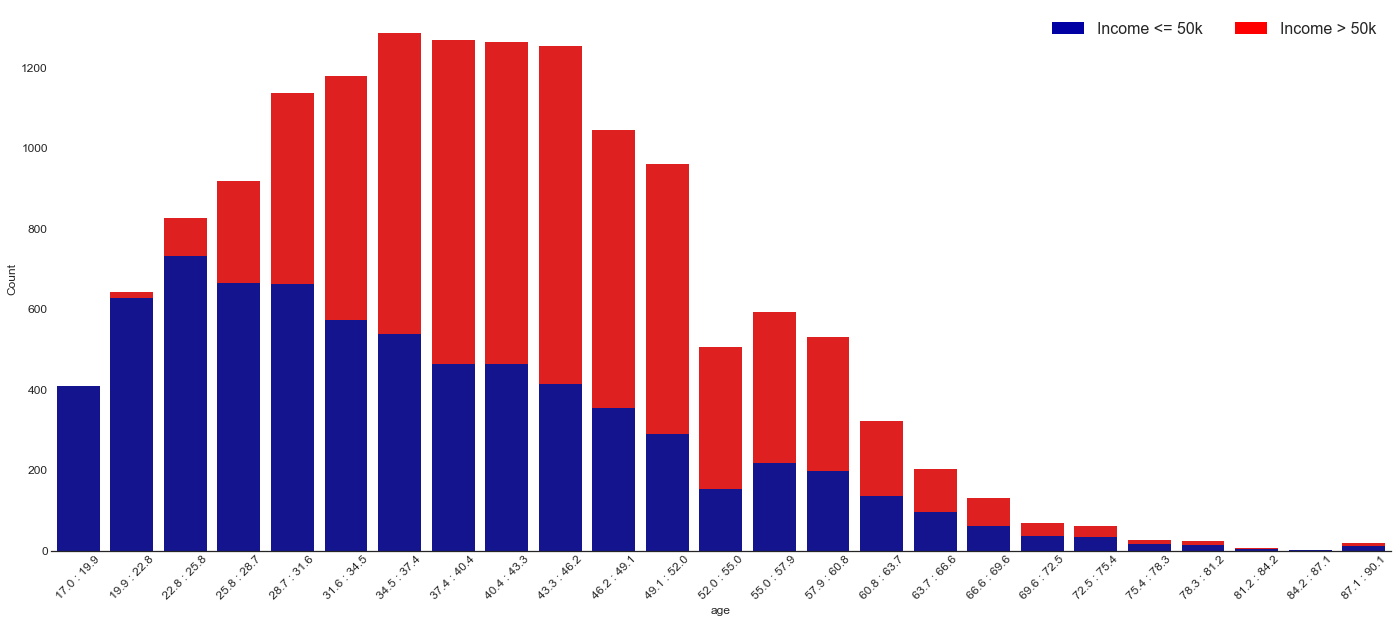

In [34]:
pd.options.mode.chained_assignment = None  
plot_bin_bar_counts(df, 'age', 25, 12)

'age' looks right-skewed, which can either be addressed with a log transformation, or simply by doing standardization.

#### Analysis of 'fnlwgt' variable

In [8]:
dataset_bin['fnlwgt'] = pd.cut(df['fnlwgt'], 10)
dataset_con['fnlwgt'] = df['fnlwgt']

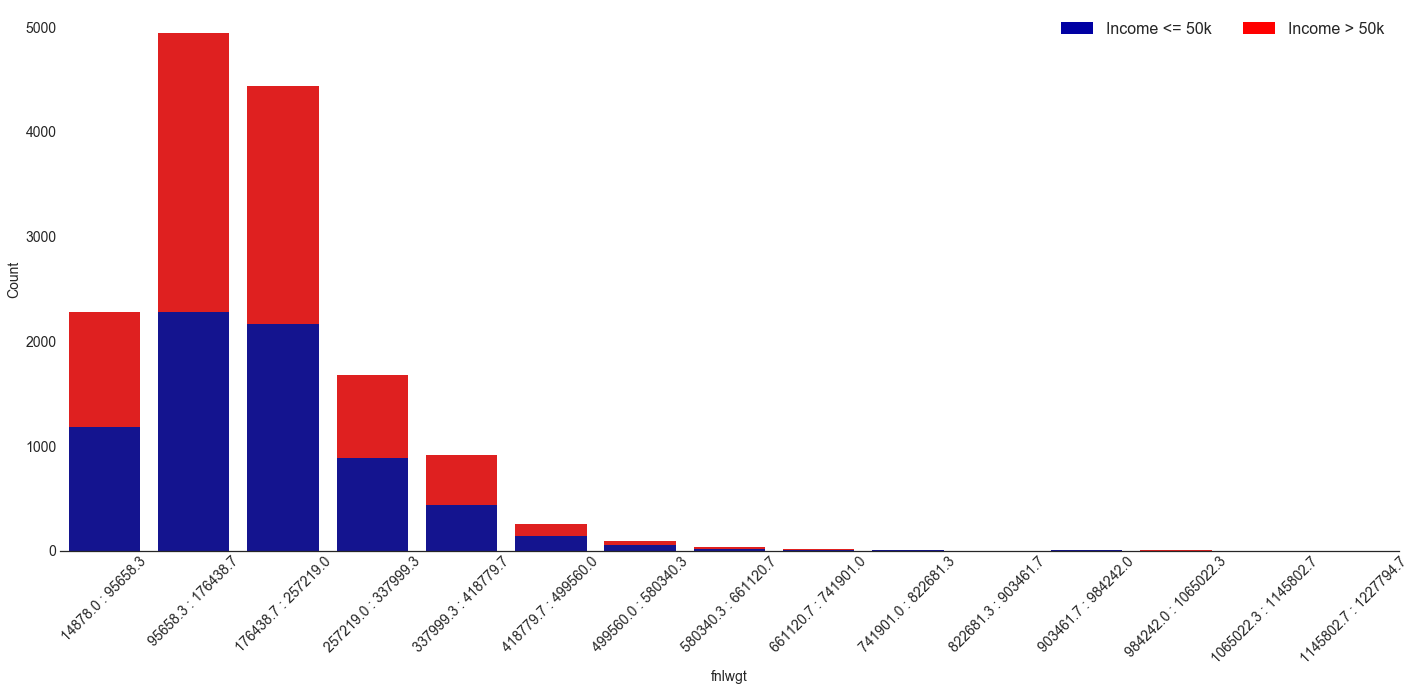

In [35]:
plot_bin_bar_counts(df, 'fnlwgt', 15)

'fnlwgt' looks right skewed, which can either be addressed with a log transformation, or simply by doing standardization

#### Analysis of 'education-num' variable

In [36]:
dataset_bin['education-num'] = pd.cut(df['education-num'], 10)
dataset_con['education-num'] = df['education-num']

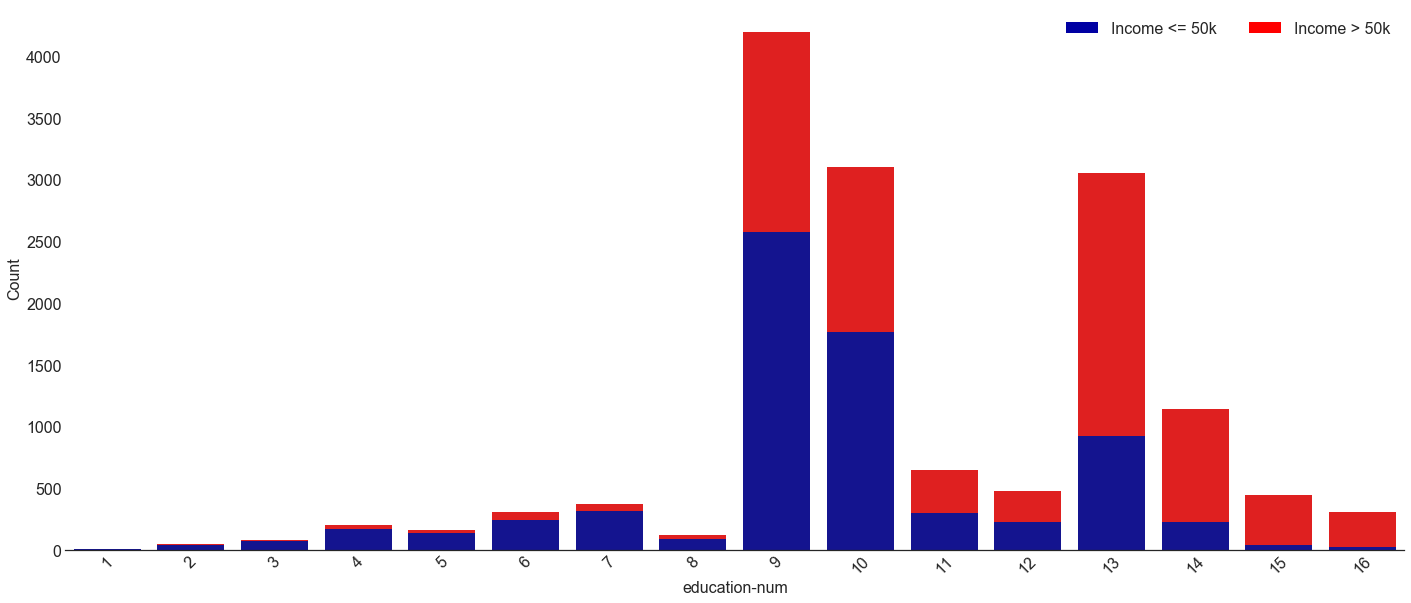

In [37]:
plot_bar_counts(df, 'education-num')

#### Analysis of 'capital-gain' variable 

In [38]:
dataset_bin['capital-gain'] = pd.cut(df['capital-gain'], 5)
dataset_con['capital-gain'] = df['capital-gain']

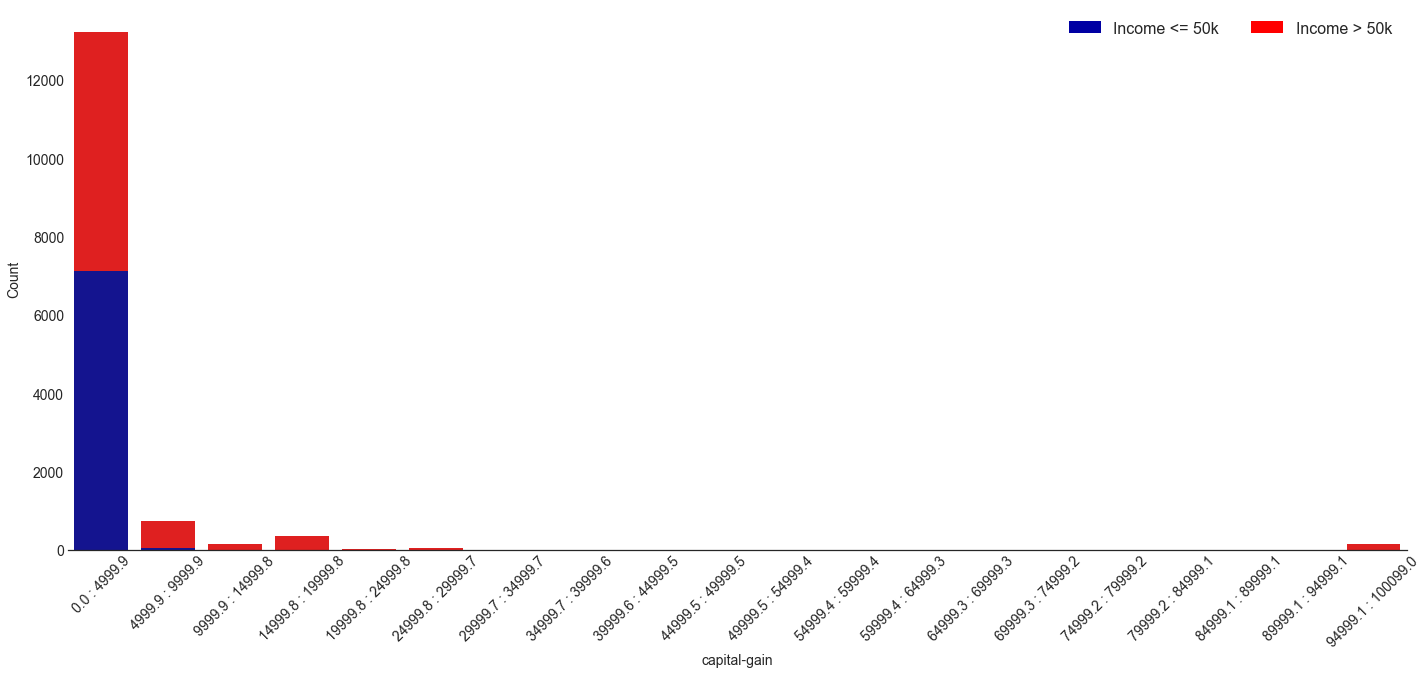

In [39]:
plot_bin_bar_counts(df, 'capital-gain', 20)

#### Analysis of 'capital-loss' variable

In [40]:
dataset_bin['capital-loss'] = pd.cut(df['capital-loss'], 5)
dataset_con['capital-loss'] = df['capital-loss']

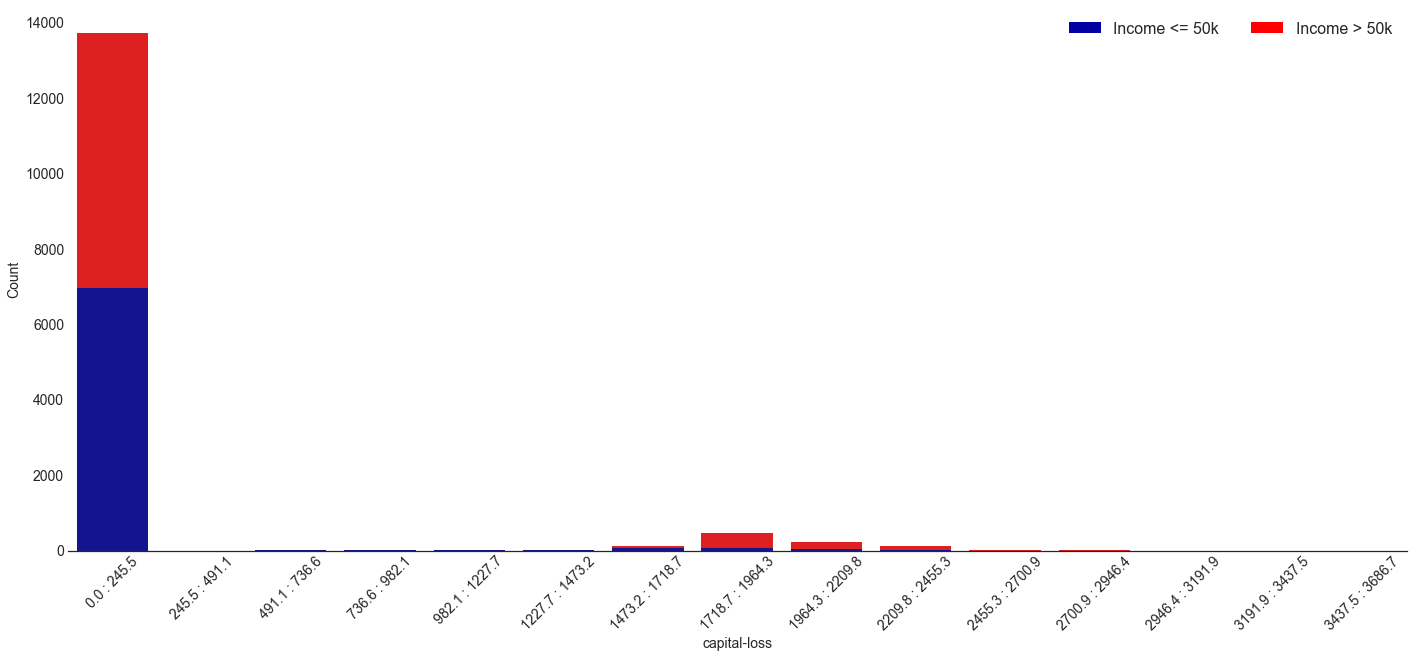

In [41]:
plot_bin_bar_counts(df,'capital-loss', 15)

#### Analysis of 'hours-per-week' variable

In [42]:
dataset_bin['hours-per-week'] = pd.cut(df['hours-per-week'], 10)
dataset_con['hours-per-week'] = df['hours-per-week']

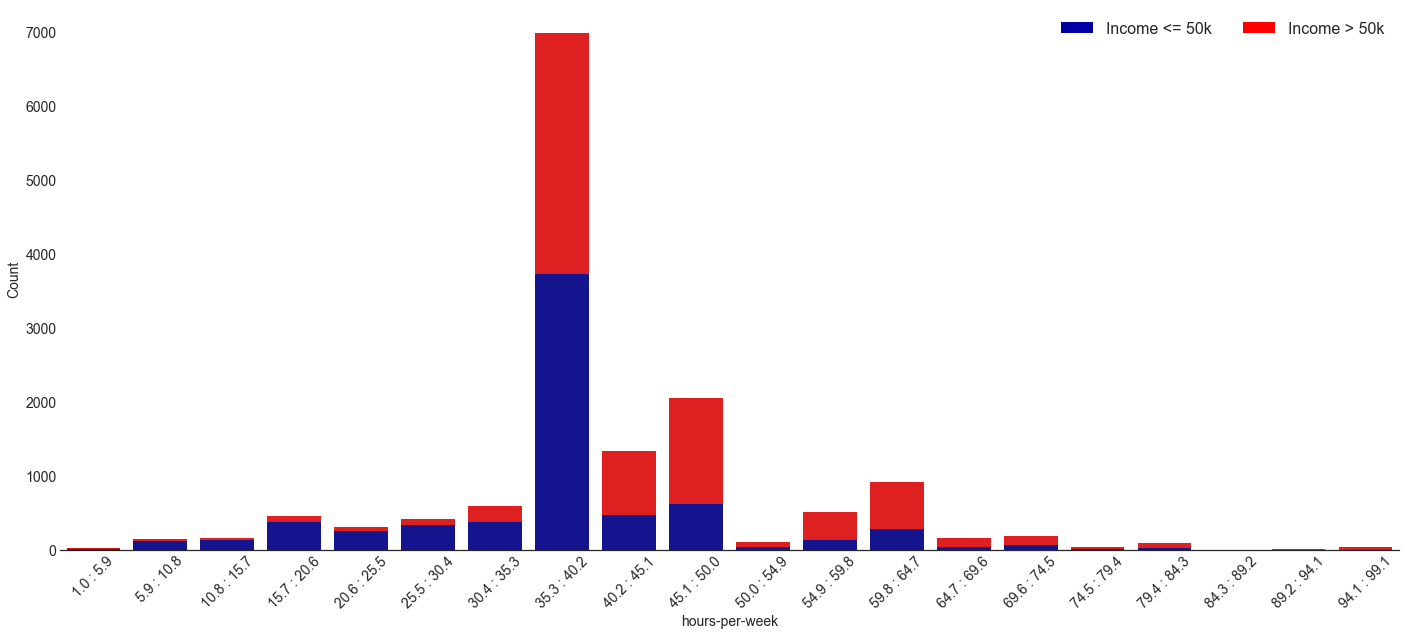

In [43]:
plot_bin_bar_counts(df, 'hours-per-week', 20)

### Categorical Variables

#### Analysis of 'workclass'

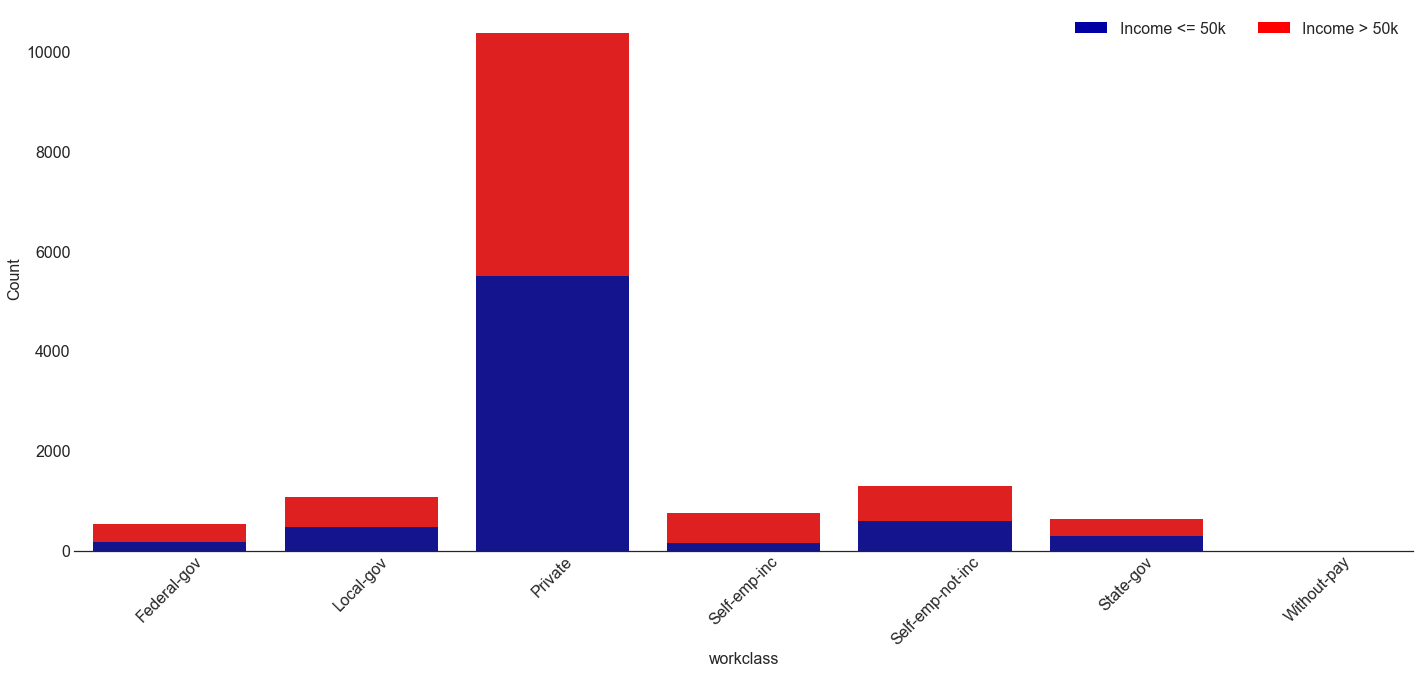

In [44]:
plot_bar_counts(df, 'workclass')

#### Analysis of 'education'

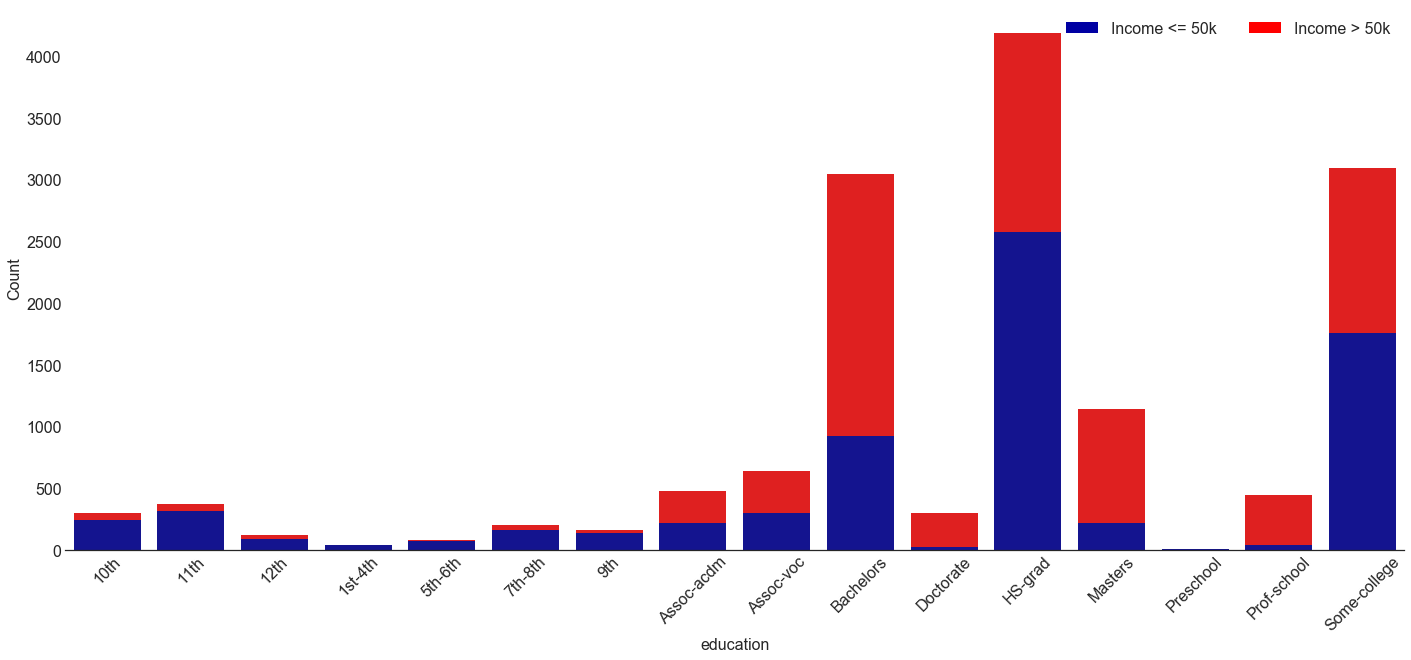

In [45]:
plot_bar_counts(df, 'education')

#### Analysis of 'marital-status'

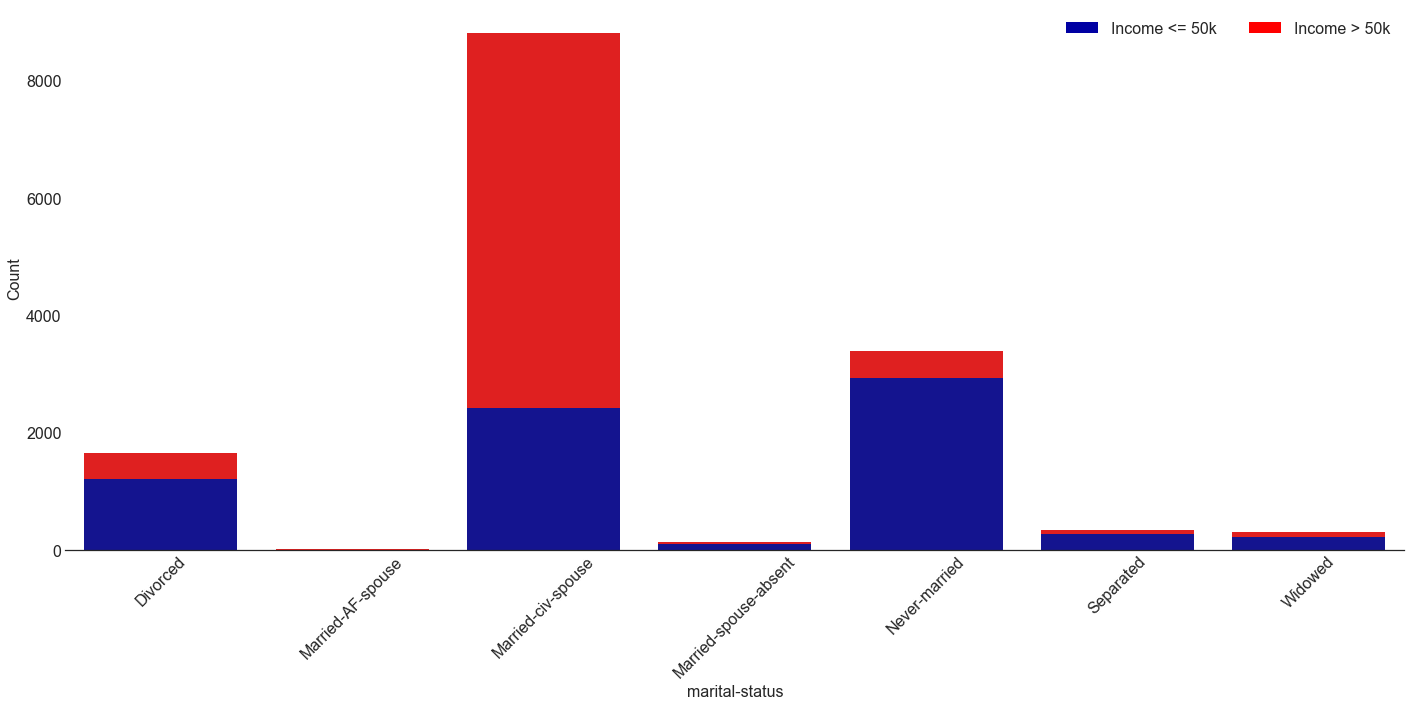

In [46]:
plot_bar_counts(df, 'marital-status')

#### Analysis of 'occupation'

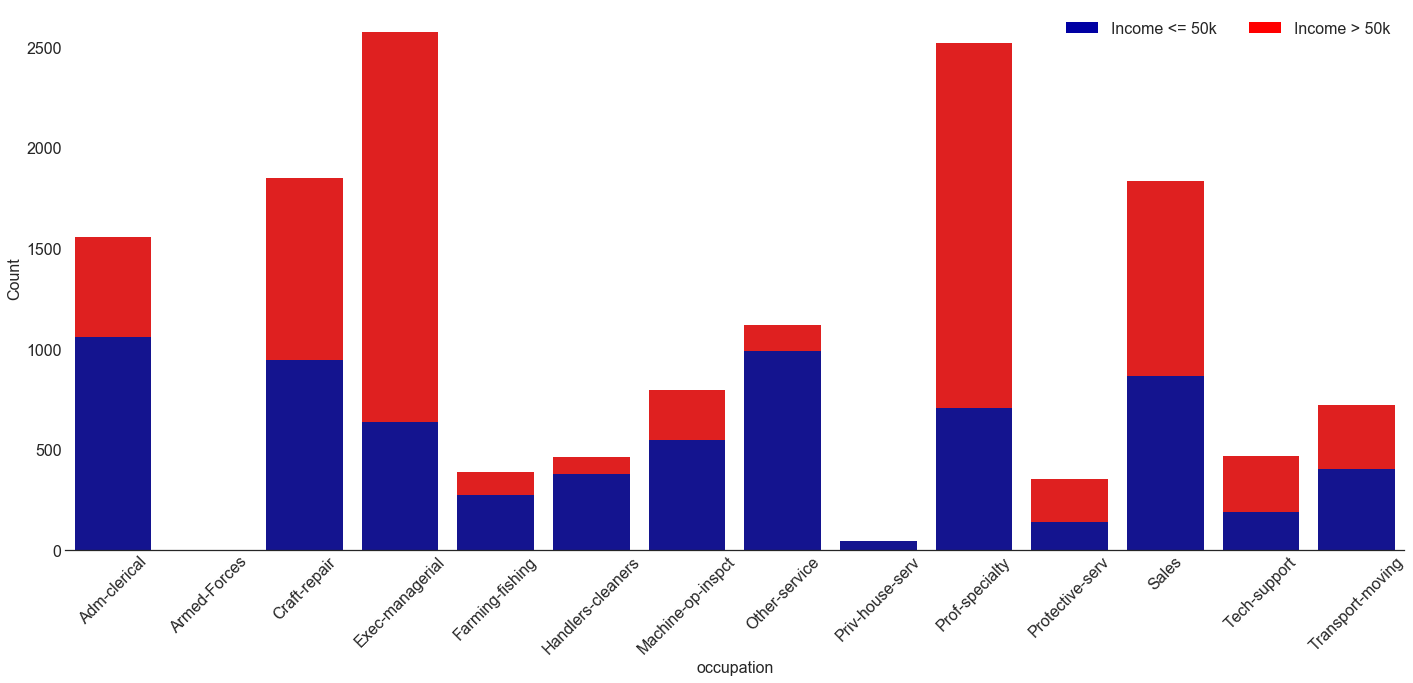

In [47]:
plot_bar_counts(df, 'occupation')

#### Analysis of 'relationship'

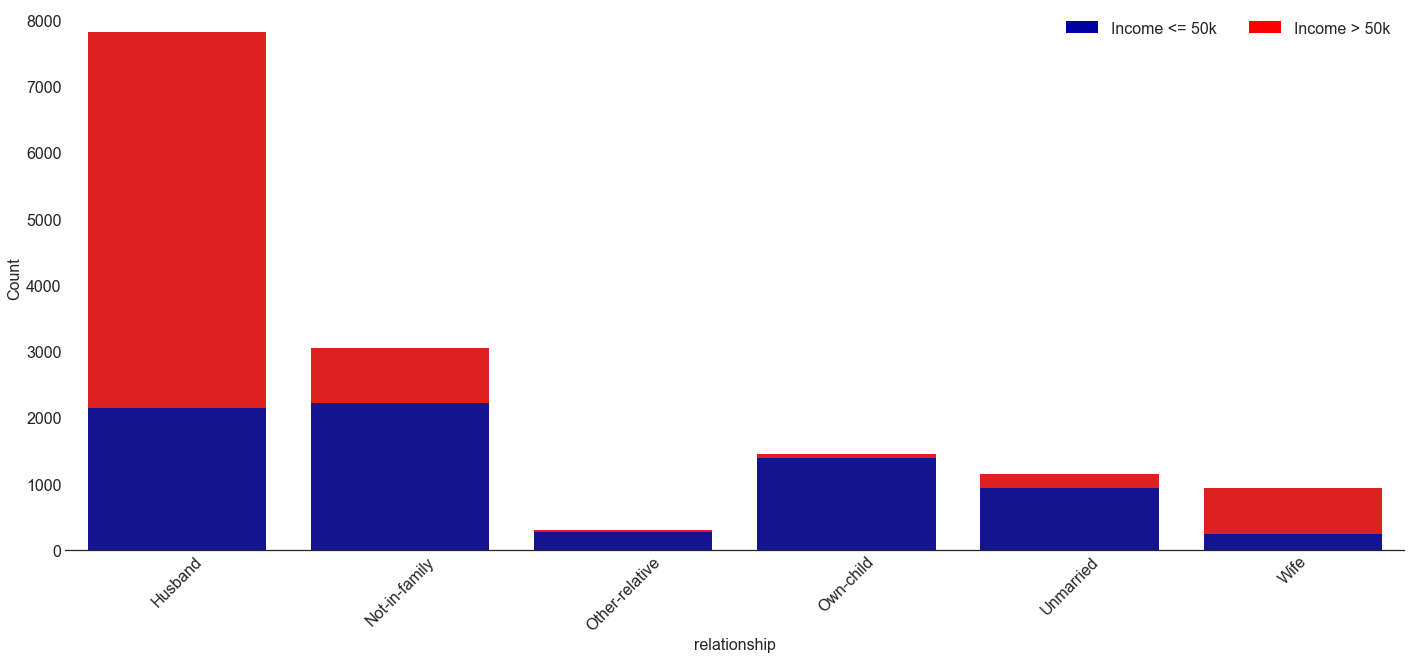

In [48]:
plot_bar_counts(df, 'relationship')

#### Analysis of 'race'

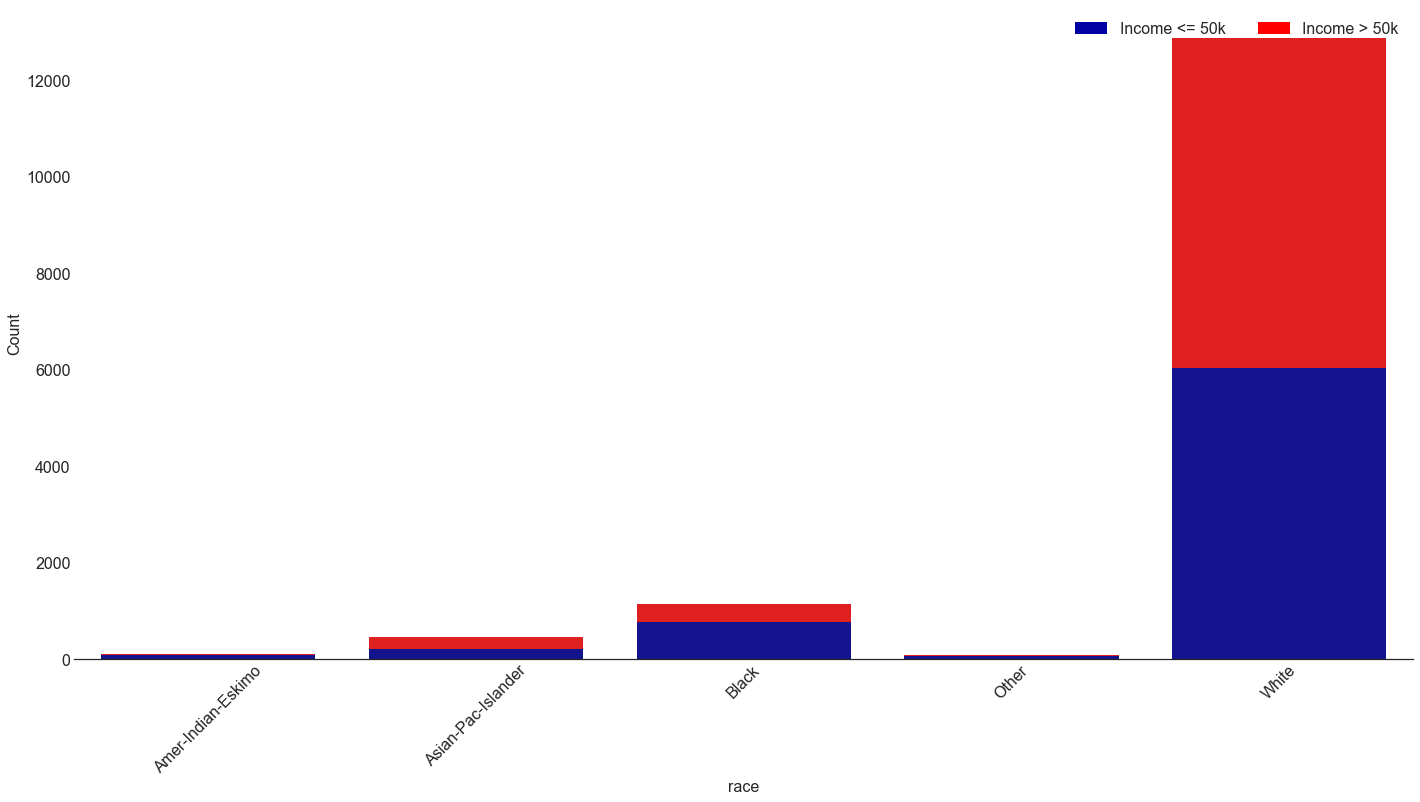

In [49]:
plot_bar_counts(df, 'race', 16, 24, 12)

#### Analysis of 'sex'

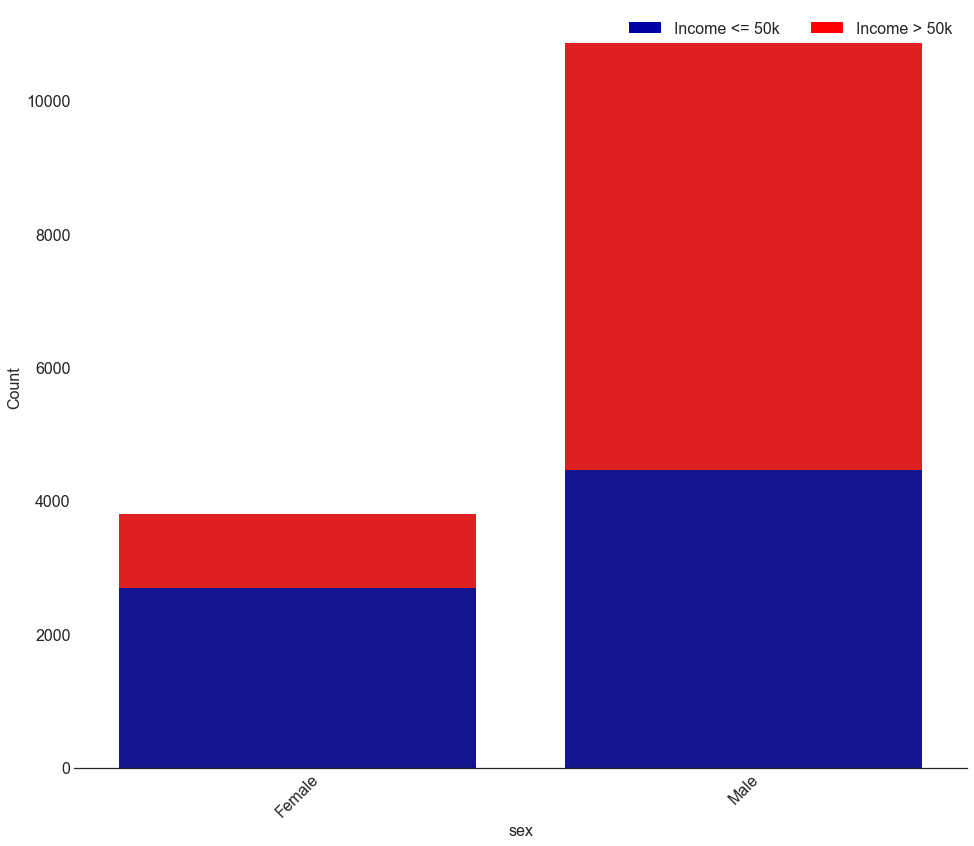

In [50]:
plot_bar_counts(df, 'sex', 16, 16, 14)

#### Analysis of 'native-country'

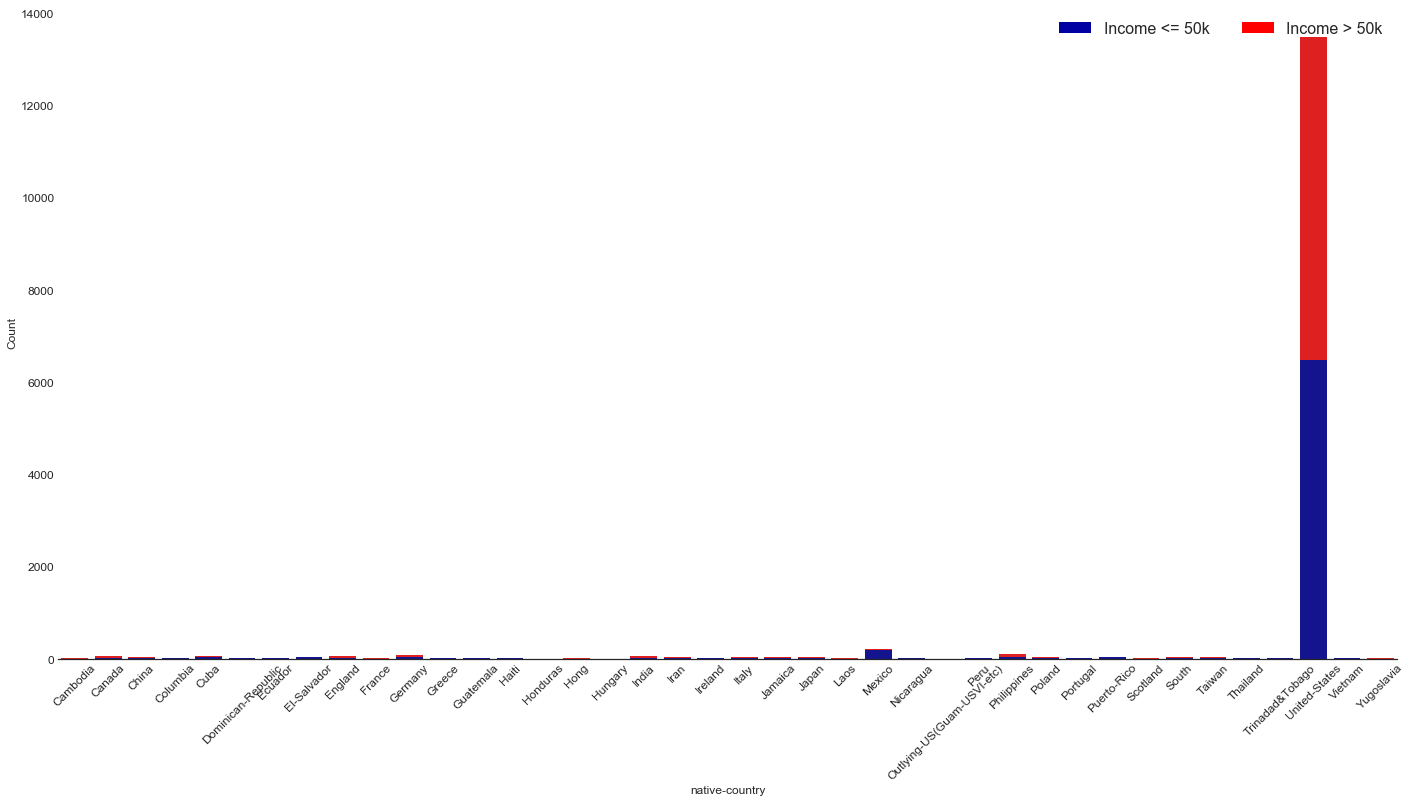

In [51]:
plot_bar_counts(df, 'native-country', 12, 24, 12)

## Feature Engineering

In [52]:
df['age-hours'] = df['age'] * df['hours-per-week']
dataset_bin['age-hours'] = pd.cut(df['age-hours'], 10)
dataset_con['age-hours'] = df['age-hours']

## Categorical Variable Encoding

### Binary Encodings

#### 'Income' and 'sex'

'Income' is the binary target for our classifier, and it was already converted to a binary variable at the beginning of the Data Visualization section. 'sex' similarly can be converted to a binary variable, and this is preferable to encoding sex as 2 one-hot vectors because those features would cause perfect multicollinearity and increase the dimensionality of the model.

In [53]:
# Convert 'sex' to a binary feature
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)
dataset_bin['sex'] = df['sex']
dataset_con['sex'] = df['sex']

### Grouping Sparse Features

If every categorical feature had one-hot encodings for each of its possible values, the dimensionality of the model would be far too high, most of the features would be sparse, and the model would overfit the training data. As such, it makes sense to first reduce the dimensionality of some of the covariates and combine sparse features to improve the model's performance. 

#### 'native-country'

In [54]:
df['native-country'] = df['native-country'].apply(native)
dataset_bin['native-country'] = df['native-country']
dataset_con['native-country'] = df['native-country']

#### 'education'

In [55]:
df['education'] = df['education'].apply(primary)
dataset_bin['education'] = df['education']
dataset_con['education'] = df['education']

#### 'marital-status'

In [56]:
df['marital-status'].replace('Married-AF-spouse', 'Married-civ-spouse', inplace=True)
dataset_bin['marital-status'] = df['marital-status']
dataset_con['marital-status'] = df['marital-status']

#### 'occupation'

In [58]:
#only 3 instances of armed-forces so it's increasing dimensionality and very sparse
#income level was near Machine-op-inspct so I replaced it with that
df['occupation'].replace('Armed-Forces', 'Machine-op-inspct', inplace=True)
#print df['occupation'].value_counts()
dataset_bin['occupation'] = df['occupation']
dataset_con['occupation'] = df['occupation']

### 'workclass'

In [59]:
df['workclass'].replace('Without-pay', 'Self-emp-inc', inplace=True)
dataset_bin['workclass'] = df['workclass']
dataset_con['workclass'] = df['workclass']

### No Encodings

In [60]:
dataset_bin['relationship'] = df['relationship']
dataset_con['relationship'] = df['relationship']

dataset_bin['race'] = df['race']
dataset_con['race'] = df['race']

### Label Encoding

In [61]:
for column in dataset_bin:
    if dataset_bin[column].dtype.name == 'category':
        dataset_bin[column] = LabelEncoder().fit_transform(dataset_bin[column])

### One-Hot Encoding

Now that the data has been through some preprocessing, the categorical variables can be encoded as one-hot vectors. The variables that need to be encoded are 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', and 'native-country'. When encoding a categorical variable that can take n possible values, creating n dummy variables, one for each possible value, will result in perfect multicollinearity. Therefore, for a variable with n possible labels, only n-1 indicator variables should be produced to encode it. Furthermore, it is best practice to omit the "largest" value as the reference category. encode_categorical_data adheres to these principles.  

Reference variables:  
workclass: Private  
education: HS-grad   
marital-status: Married-civ-spouse  
occupation: Exec-managerial  
relationship: Husband  
race: White  
native-country: US  

In [62]:
dataset_bin = encode_categorical_data(dataset_bin)

dataset_con = encode_categorical_data(dataset_con)

## Saving Datasets

Initial data set isn't shuffled; the first 7842 examples have positive labels and the remaininder have negative labels. Before standardizing the features, the data set needs to be partitioned into training and test sets; thus, the first step required is shuffling df.

In [23]:
dataset_con.to_csv('data/dataset_con.csv', index=False)
dataset_bin.to_csv('data/dataset_bin.csv', index=False)